In [67]:
import numpy as np
import pandas as pd
from scipy import integrate
import dabest
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
my_color_palette =  {'Dz 5mg/kg':'#8FB996','NaCl':'#594157', 'PTZ 20mg/kg':'#c7991a'}

In [68]:
# Load SP data
All_SP_df = pd.read_pickle('Mice_data/'+'All_SP_CA1 R')
metric = 'Sum LL 250ms'
cnd_order = ['NaCl','Dz 5mg/kg','PTZ 20mg/kg']

Text(0.5, 0, 'Intensity[v]')

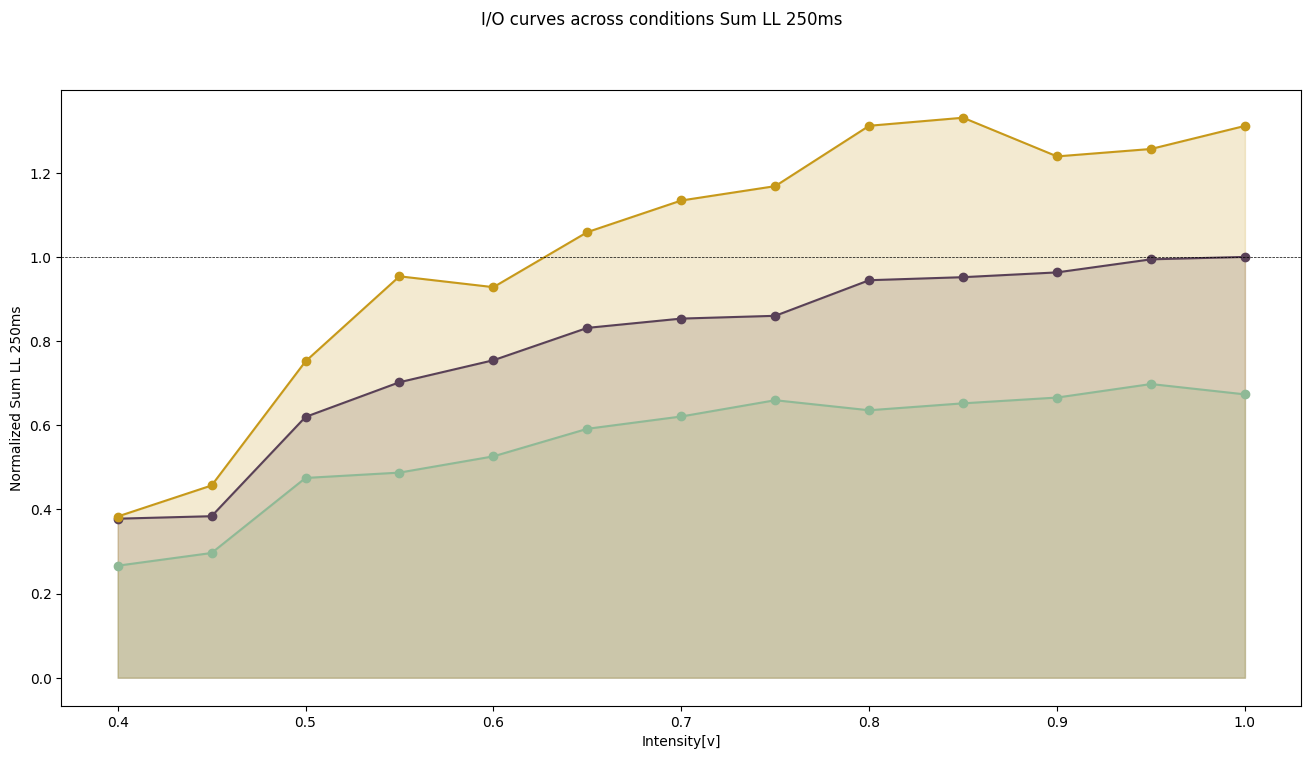

In [71]:
title = 'I/O curves across conditions ' + metric
fig1 = plt.figure(title, figsize=(16, 8)).suptitle(title)
gridspec.GridSpec(12, 12)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
for cnd in cnd_order:
    cnd_df = All_SP_df[All_SP_df['Condition'] == cnd]
    Mean_cnd = cnd_df.groupby(['Intensity[v]'])['Normalized ' + metric].mean()
    ax1.plot(Mean_cnd,marker='o', label=cnd, color=my_color_palette[cnd])
    ax1.fill_between(x=Mean_cnd.index,y1=0, y2=Mean_cnd,  color=my_color_palette[cnd], alpha=0.2)
ax1.axhline(y=1, color='k', linestyle='--', linewidth=0.5)
ax1.set_ylabel('Normalized ' + metric)
ax1.set_xlabel('Intensity[v]')

In [72]:
# Compute Area Under the Curve (AUC) for each sessions:
All_SP_df['Animal x Block'] = All_SP_df['Animal'] + ' x ' + All_SP_df['Block'].astype(str)
animal_list = []; AUC_list = []; Block_list = []; Cnd_list = []
for session in All_SP_df['Filename'].unique():
    df = All_SP_df[All_SP_df['Filename']==session]
    Intensities = np.sort(df['Intensity[v]'].unique())
    Mean_value = df.groupby(['Intensity[v]'])['Normalized ' + metric].mean()
    cnd = df['Condition'].unique()[0]
    block = df['Animal x Block'].unique()[0]
    AUC = integrate.trapz(Mean_value, Intensities)
    animal_list.append(animal); AUC_list.append(AUC); Block_list.append(block); Cnd_list.append(cnd)

In [73]:
# Save all AUC in a dataframe
AUC_df = pd.DataFrame({'Animal':animal_list, 'AUC':AUC_list, 'Animal x Block':Block_list, 'Condition':Cnd_list})
print(AUC_df)

           Animal       AUC    Animal x Block  Condition
0    Ent_CamK2_58  0.352424  Ent_CamK2_03 x 0  Dz 5mg/kg
1    Ent_CamK2_58  0.373078  Ent_CamK2_03 x 0       NaCl
2    Ent_CamK2_58  0.343508  Ent_CamK2_03 x 1       NaCl
3    Ent_CamK2_58  0.336184  Ent_CamK2_03 x 1  Dz 5mg/kg
4    Ent_CamK2_58  0.350643  Ent_CamK2_03 x 2       NaCl
..            ...       ...               ...        ...
104  Ent_CamK2_58  0.420268  Ent_CamK2_56 x 4       NaCl
105  Ent_CamK2_58  0.270772  Ent_CamK2_57 x 4  Dz 5mg/kg
106  Ent_CamK2_58  0.416044  Ent_CamK2_57 x 4       NaCl
107  Ent_CamK2_58  0.475949  Ent_CamK2_58 x 4       NaCl
108  Ent_CamK2_58  0.337897  Ent_CamK2_58 x 4  Dz 5mg/kg

[109 rows x 4 columns]


In [74]:
# For each block, normalization to the control (NaCl) AUC :
all_block = np.sort(np.unique(AUC_df['Animal x Block']))
AUC_df['Normalized AUC'] = np.nan
for block in all_block:
    Mean_NaCl = np.nanmean (AUC_df['AUC'] [(AUC_df['Condition'] == 'NaCl') & (AUC_df['Animal x Block'] == block)])
    AUC_df.loc[AUC_df["Animal x Block"] == block,'Normalized AUC'] = AUC_df['AUC'][AUC_df["Animal x Block"] == block] / Mean_NaCl

In [75]:
print(AUC_df)

           Animal       AUC    Animal x Block  Condition  Normalized AUC
0    Ent_CamK2_58  0.352424  Ent_CamK2_03 x 0  Dz 5mg/kg        0.944639
1    Ent_CamK2_58  0.373078  Ent_CamK2_03 x 0       NaCl        1.000000
2    Ent_CamK2_58  0.343508  Ent_CamK2_03 x 1       NaCl        1.000000
3    Ent_CamK2_58  0.336184  Ent_CamK2_03 x 1  Dz 5mg/kg        0.978678
4    Ent_CamK2_58  0.350643  Ent_CamK2_03 x 2       NaCl        1.000000
..            ...       ...               ...        ...             ...
104  Ent_CamK2_58  0.420268  Ent_CamK2_56 x 4       NaCl        1.000000
105  Ent_CamK2_58  0.270772  Ent_CamK2_57 x 4  Dz 5mg/kg        0.650825
106  Ent_CamK2_58  0.416044  Ent_CamK2_57 x 4       NaCl        1.000000
107  Ent_CamK2_58  0.475949  Ent_CamK2_58 x 4       NaCl        1.000000
108  Ent_CamK2_58  0.337897  Ent_CamK2_58 x 4  Dz 5mg/kg        0.709943

[109 rows x 5 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:389: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 41.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dabest/plotter.py:438: UserWarning: FixedFormatter should only be used together with Fixed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


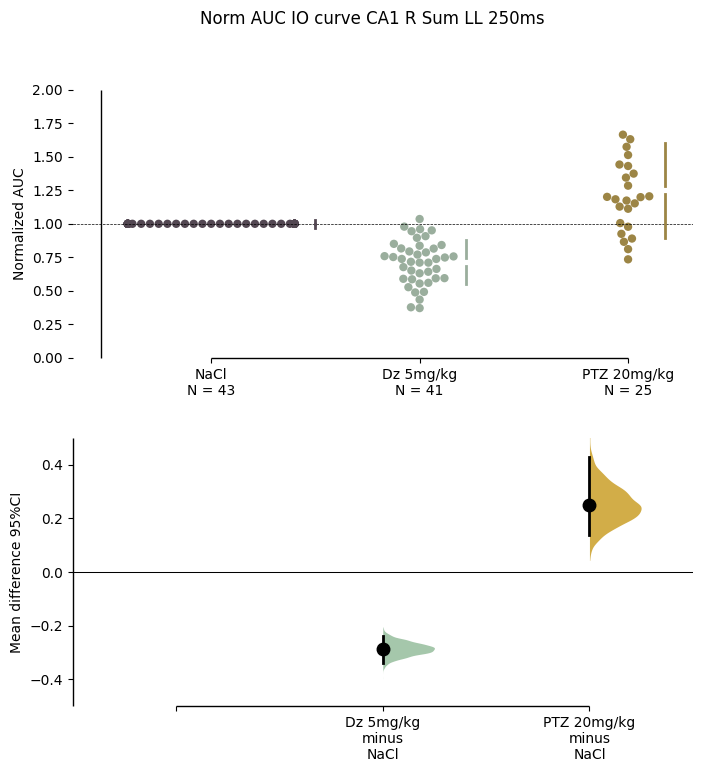

In [76]:
# Plot normalized AUC across sessions:
title= 'Norm AUC IO curve CA1 R ' + metric
fig1 = plt.figure(title, figsize=(8, 8)).suptitle(title)
gridspec.GridSpec(12, 12)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
mulit_groupe = dabest.load(AUC_df, idx= cnd_order,x="Condition", y='Normalized AUC')
mulit_groupe.mean_diff.plot(ax=ax1,custom_palette=my_color_palette, swarm_label='Normalized AUC',swarm_ylim= [0,2],
                                 contrast_label="Mean difference 95%CI",contrast_ylim= [-0.5,0.5])
ax1.axhline(y=1, color='k', linestyle='--', linewidth=0.5)